In [199]:
%pylab --no-import-all notebook
import pandas as pd 
#import matplotlib.pyplot as plt
import os
#import numpy as np
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
path = os.getcwd()+"/Data12/"
os.listdir(path)

['.DS_Store', 'pizzasize.csv', 'pizzasize.txt']

# Načtení dat

In [4]:
data = pd.read_csv(path + "pizzasize.csv")

In [5]:
data.set_index("ID", inplace=True)

In [6]:
data.head(5)

,Store,CrustDescription,Topping,Diameter
ID,,,,
1,Dominos,ThinNCrispy,Supreme,29.40
2,Dominos,ThinNCrispy,BBQMeatlovers,29.63
3,Dominos,DeepPan,Hawaiian,27.06
4,Dominos,ThinNCrispy,Supreme,27.45
5,Dominos,ClassicCrust,Hawaiian,26.59


In [7]:
store1, store2 = pd.unique(data["Store"])
print(store1, store2)

Dominos EagleBoys


In [8]:
data_np = np.array(data)

# Rozdělení dat podle řetězců

In [9]:
data_Dominos = np.array([i for i in data_np if i[0]==store1])
data_EagleBoys = np.array([i for i in data_np if i[0]==store2])

# Přejmenování

In [10]:
np.unique(data_Dominos[:,1])

array(['ClassicCrust', 'DeepPan', 'ThinNCrispy'], dtype=object)

In [11]:
np.unique(data_EagleBoys[:,1])

array(['DeepPan', 'MidCrust', 'ThinCrust'], dtype=object)

In [12]:
np.unique(data_Dominos[:,2])

array(['BBQMeatlovers', 'Hawaiian', 'Supreme'], dtype=object)

In [13]:
np.unique(data_EagleBoys[:,2])

array(['BBQMeatlovers', 'Hawaiian', 'SuperSupremo'], dtype=object)

In [14]:
data_EagleBoys[data_EagleBoys[:,2] == "SuperSupremo", 2] = "Supreme"
data_EagleBoys[data_EagleBoys[:,1] == "ThinCrust", 1] = "Thin"
data_EagleBoys[data_EagleBoys[:,1] == "MidCrust", 1] = "Mid"

In [15]:
data_Dominos[data_Dominos[:,1] == "ThinNCrispy", 1] = "Thin"
data_Dominos[data_Dominos[:,1] == "ClassicCrust", 1] = "Mid"

In [16]:
np.unique(data_EagleBoys[:,1])==np.unique(data_Dominos[:,1])

array([ True,  True,  True])

In [17]:
data_np[data_np[:,2] == "SuperSupremo", 2] = "Supreme"
data_np[data_np[:,1] == "ThinCrust", 1] = "Thin"
data_np[data_np[:,1] == "MidCrust", 1] = "Mid" 
data_np[data_np[:,1] == "ThinNCrispy", 1] = "Thin"
data_np[data_np[:,1] == "ClassicCrust", 1] = "Mid"

In [18]:
cols = data.columns.tolist()
cols[1] = 'Crust'
cols

['Store', 'Crust', 'Topping', 'Diameter']

In [19]:
Mod_Data = pd.DataFrame(data_np, columns=cols)
Mod_Data.head(10)

,Store,Crust,Topping,Diameter
0,Dominos,Thin,Supreme,29.4
1,Dominos,Thin,BBQMeatlovers,29.63
2,Dominos,DeepPan,Hawaiian,27.06
3,Dominos,Thin,Supreme,27.45
4,Dominos,Mid,Hawaiian,26.59
5,Dominos,DeepPan,BBQMeatlovers,27.16
6,EagleBoys,Mid,Supreme,29.15
7,EagleBoys,DeepPan,Hawaiian,28.78
8,EagleBoys,Thin,BBQMeatlovers,30.05
9,EagleBoys,DeepPan,BBQMeatlovers,29.38


# Třídění podle Kůrky

In [20]:
data_Dominos = np.array([i for i in data_np if i[0]==store1])
data_EagleBoys = np.array([i for i in data_np if i[0]==store2])

In [21]:
data_Dominos_Thin = np.array([i for i in data_Dominos if i[1]=="Thin"])
data_Dominos_Mid = np.array([i for i in data_Dominos if i[1]=="Mid"])
data_Dominos_DeepPan = np.array([i for i in data_Dominos if i[1]=="DeepPan"])

In [22]:
data_Dominos_DeepPan[:5]

array([['Dominos', 'DeepPan', 'Hawaiian', 27.06],
       ['Dominos', 'DeepPan', 'BBQMeatlovers', 27.16],
       ['Dominos', 'DeepPan', 'BBQMeatlovers', 26.6],
       ['Dominos', 'DeepPan', 'Supreme', 26.5],
       ['Dominos', 'DeepPan', 'Supreme', 26.64]], dtype=object)

In [23]:
data_EagleBoys_Thin = np.array([i for i in data_EagleBoys if i[1]=="Thin"])
data_EagleBoys_Mid = np.array([i for i in data_EagleBoys if i[1]=="Mid"])
data_EagleBoys_DeepPan = np.array([i for i in data_EagleBoys if i[1]=="DeepPan"])

In [24]:
data_EagleBoys_Thin[:5]

array([['EagleBoys', 'Thin', 'BBQMeatlovers', 30.05],
       ['EagleBoys', 'Thin', 'Supreme', 29.14],
       ['EagleBoys', 'Thin', 'Hawaiian', 29.98],
       ['EagleBoys', 'Thin', 'Supreme', 29.47],
       ['EagleBoys', 'Thin', 'Supreme', 30.0]], dtype=object)

In [25]:
matrix_Dominos = np.array([
                   ["Thin",  len(data_Dominos_Thin[data_Dominos_Thin[:,2]== "Hawaiian"]), 
                    len(data_Dominos_Thin[data_Dominos_Thin[:,2]=="Supreme"]), 
                    len(data_Dominos_Thin[data_Dominos_Thin[:,2]=="BBQMeatlovers"]), 
                    len(data_Dominos[data_Dominos[:,1] == "Thin", -1])],
                   
                    ["Mid",  len(data_Dominos_Mid[data_Dominos_Mid[:,2]== "Hawaiian"]), 
                    len(data_Dominos_Mid[data_Dominos_Mid[:,2]=="Supreme"]), 
                    len(data_Dominos_Mid[data_Dominos_Mid[:,2]=="BBQMeatlovers"]), 
                    len(data_Dominos[data_Dominos[:,1] == "Mid", -1])],
                    
                    ["DeepPan",  len(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]== "Hawaiian"]), 
                    len(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]=="Supreme"]), 
                    len(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]=="BBQMeatlovers"]), 
                    len(data_Dominos[data_Dominos[:,1] == "DeepPan", -1])],
                   
                    ["součty", len(data_Dominos[data_Dominos[:,2] == "Hawaiian", -1]),
                    len(data_Dominos[data_Dominos[:,2] == "Supreme", -1]),
                    len(data_Dominos[data_Dominos[:,2] == "BBQMeatlovers", -1]),
                    len(data_Dominos[:,-1])],

                   
                   
                  ])

In [26]:
pd.DataFrame(matrix_Dominos, columns=[ "Druh", "Hawaiian", "Supreme", "BBQMeatlovers", "součty"])

,Druh,Hawaiian,Supreme,BBQMeatlovers,součty
0,Thin,14,15,14,43
1,Mid,14,13,15,42
2,DeepPan,13,13,14,40
3,součty,41,41,43,125


In [27]:
pd.DataFrame(matrix_Dominos, columns=[ "Druh", "Hawaiian", "Supreme", "BBQMeatlovers", "součty"]).set_index("Druh").to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Hawaiian & Supreme & BBQMeatlovers & součty \\\\\nDruh    &          &         &               &        \\\\\n\\midrule\nThin    &       14 &      15 &            14 &     43 \\\\\nMid     &       14 &      13 &            15 &     42 \\\\\nDeepPan &       13 &      13 &            14 &     40 \\\\\nsoučty  &       41 &      41 &            43 &    125 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [28]:
matrix_EagleBoys = np.array([
                   ["Thin",  len(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]== "Hawaiian"]), 
                    len(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]=="Supreme"]), 
                    len(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]=="BBQMeatlovers"]), 
                    len(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1])],
                   
                    ["Mid",  len(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]== "Hawaiian"]), 
                    len(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]=="Supreme"]), 
                    len(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]=="BBQMeatlovers"]), 
                    len(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1])],
                    
                    ["DeepPan",  len(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]== "Hawaiian"]), 
                    len(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]=="Supreme"]), 
                    len(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]=="BBQMeatlovers"]), 
                    len(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1])],
                   
                    ["součty", len(data_EagleBoys[data_EagleBoys[:,2] == "Hawaiian", -1]),
                    len(data_EagleBoys[data_EagleBoys[:,2] == "Supreme", -1]),
                    len(data_EagleBoys[data_EagleBoys[:,2] == "BBQMeatlovers", -1]),
                    len(data_EagleBoys[:,-1])],

                   
                   
                  ])

In [29]:
pd.DataFrame(matrix_EagleBoys, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "součty"]).set_index("Druh/Omáčka")

,Hawaiian,Supreme,BBQMeatlovers,součty
Druh/Omáčka,,,,
Thin,13,14,12,39
Mid,14,14,15,43
DeepPan,16,12,15,43
součty,43,40,42,125


In [30]:
pd.DataFrame(matrix_EagleBoys, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "součty"]).set_index("Druh/Omáčka").to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Hawaiian & Supreme & BBQMeatlovers & součty \\\\\nDruh/Omáčka &          &         &               &        \\\\\n\\midrule\nThin        &       13 &      14 &            12 &     39 \\\\\nMid         &       14 &      14 &            15 &     43 \\\\\nDeepPan     &       16 &      12 &            15 &     43 \\\\\nsoučty      &       43 &      40 &            42 &    125 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [31]:
#np.save("matrix_EagleBoys_original.npy", matrix_EagleBoys)

In [32]:
matrix_Dominos_means = np.array([
                   ["Thin",  round(data_Dominos_Thin[data_Dominos_Thin[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_Dominos_Thin[data_Dominos_Thin[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_Dominos_Thin[data_Dominos_Thin[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_Dominos[data_Dominos[:,1] == "Thin", -1].mean(), 2)],
                   
                    ["Mid",  round(data_Dominos_Mid[data_Dominos_Mid[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_Dominos_Mid[data_Dominos_Mid[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_Dominos_Mid[data_Dominos_Mid[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_Dominos[data_Dominos[:,1] == "Mid", -1].mean(), 2)],
                    
                    ["DeepPan",  round(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_Dominos[data_Dominos[:,1] == "DeepPan", -1].mean(), 2)],
                   
                    ["průměr", round(data_Dominos[data_Dominos[:,2] == "Hawaiian", -1].mean(), 2),
                    round(data_Dominos[data_Dominos[:,2] == "Supreme", -1].mean(), 2),
                    round(data_Dominos[data_Dominos[:,2] == "BBQMeatlovers", -1].mean(), 2),
                    round(data_Dominos[:,-1].mean(), 2)]
                   
                  ])



In [33]:
pd.DataFrame(matrix_Dominos_means, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "průměr"])

,Druh/Omáčka,Hawaiian,Supreme,BBQMeatlovers,průměr
0,Thin,28.83,28.75,28.86,28.81
1,Mid,26.58,27.1,26.62,26.75
2,DeepPan,26.63,26.79,26.65,26.69
3,průměr,27.36,27.61,27.36,27.44


In [34]:
matrix_EagleBoys_means = np.array([
                   ["Thin",  round(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1].mean(), 2)],
                   
                    ["Mid",  round(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1].mean(), 2)],
                    
                    ["DeepPan",  round(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1].mean(), 2)],
                   
                    ["průměr", round(data_EagleBoys[data_EagleBoys[:,2] == "Hawaiian", -1].mean(), 2),
                    round(data_EagleBoys[data_EagleBoys[:,2] == "Supreme", -1].mean(), 2),
                    round(data_EagleBoys[data_EagleBoys[:,2] == "BBQMeatlovers", -1].mean(), 2),
                    round(data_EagleBoys[:,-1].mean(), 2)]
                   
                  ])



In [35]:
pd.DataFrame(matrix_EagleBoys_means, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "průměr"])

,Druh/Omáčka,Hawaiian,Supreme,BBQMeatlovers,průměr
0,Thin,29.68,29.72,29.7,29.7
1,Mid,28.84,28.62,28.88,28.78
2,DeepPan,29.15,29.09,29.02,29.09
3,průměr,29.21,29.15,29.16,29.17


In [36]:
pd.DataFrame(matrix_Dominos_means, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "průměr"]).to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n{} & Druh/Omáčka & Hawaiian & Supreme & BBQMeatlovers & průměr \\\\\n\\midrule\n0 &        Thin &    28.83 &   28.75 &         28.86 &  28.81 \\\\\n1 &         Mid &    26.58 &    27.1 &         26.62 &  26.75 \\\\\n2 &     DeepPan &    26.63 &   26.79 &         26.65 &  26.69 \\\\\n3 &      průměr &    27.36 &   27.61 &         27.36 &  27.44 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [37]:
pd.DataFrame(matrix_EagleBoys_means, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "průměr"]).set_index("Druh/Omáčka").to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Hawaiian & Supreme & BBQMeatlovers & průměr \\\\\nDruh/Omáčka &          &         &               &        \\\\\n\\midrule\nThin        &    29.68 &   29.72 &          29.7 &   29.7 \\\\\nMid         &    28.84 &   28.62 &         28.88 &  28.78 \\\\\nDeepPan     &    29.15 &   29.09 &         29.02 &  29.09 \\\\\nprůměr      &    29.21 &   29.15 &         29.16 &  29.17 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [72]:
numan = np.array([
                   ["Thin",  round(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1].mean(), 2),
                   round(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1].std(), 2),
                   round(np.median(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1]), 2),
                   data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1].min(),
                   data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1].max()],
                   
                   ["Mid",  round(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1].mean(), 2),
                   round(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1].std(), 2),
                   round(np.median(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1]), 2),
                   data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1].min(),
                   data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1].max()],
                    
                   ["DeepPan",  round(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1].mean(), 2),
                   round(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1].std(), 2),
                   round(np.median(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1]), 2),
                   data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1].min(),
                   data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1].max()],
                   
                   ["Celkem",  round(data_EagleBoys[:, -1].mean(), 2),
                   round(data_EagleBoys[:, -1].std(), 2),
                   round(np.median(data_EagleBoys[:, -1]), 2),
                   data_EagleBoys[:, -1].min(),
                   data_EagleBoys[:, -1].max()],
    
                   ["Thin",  round(data_Dominos[data_Dominos[:,1] == "Thin", -1].mean(), 2),
                   round(data_Dominos[data_Dominos[:,1] == "Thin", -1].std(), 2),
                   round(np.median(data_Dominos[data_Dominos[:,1] == "Thin", -1]), 2),
                   data_Dominos[data_Dominos[:,1] == "Thin", -1].min(),
                   data_Dominos[data_Dominos[:,1] == "Thin", -1].max()],
    
                   ["Mid",  round(data_Dominos[data_Dominos[:,1] == "Mid", -1].mean(), 2),
                   round(data_Dominos[data_Dominos[:,1] == "Mid", -1].std(), 2),
                   round(np.median(data_Dominos[data_Dominos[:,1] == "Mid", -1]), 2),
                   data_Dominos[data_Dominos[:,1] == "Mid", -1].min(),
                   data_Dominos[data_Dominos[:,1] == "Mid", -1].max()],
        
                   ["DeepPan",  round(data_Dominos[data_Dominos[:,1] == "DeepPan", -1].mean(), 2),
                   round(data_Dominos[data_Dominos[:,1] == "DeepPan", -1].std(), 2),
                   round(np.median(data_Dominos[data_Dominos[:,1] == "DeepPan", -1]), 2),
                   data_Dominos[data_Dominos[:,1] == "DeepPan", -1].min(),
                   data_Dominos[data_Dominos[:,1] == "DeepPan", -1].max()],
    
                   ["Celkem",  round(data_Dominos[:, -1].mean(), 2),
                   round(data_Dominos[:, -1].std(), 2),
                   round(np.median(data_Dominos[:, -1]), 2),
                   data_Dominos[:, -1].min(),
                   data_Dominos[:, -1].max()]
                    
                  ])

In [77]:
pd.DataFrame(numan, columns= [" ","Průměr", "Odchylka", "Medián", "Min", "Max"])

,,Průměr,Odchylka,Medián,Min,Max
0,Thin,29.7,0.54,29.68,28.54,31.06
1,Mid,28.78,0.48,28.8,26.58,29.81
2,DeepPan,29.09,0.47,29.01,28.19,30.37
3,Celkem,29.17,0.62,29.08,26.58,31.06
4,Thin,28.81,0.79,29.01,25.58,29.66
5,Mid,26.75,0.5,26.7,25.51,28.9
6,DeepPan,26.69,0.46,26.62,25.98,28.79
7,Celkem,27.44,1.16,26.93,25.51,29.66


In [78]:
pd.DataFrame(numan, columns= [" ","Průměr", "Odchylka", "Medián", "Min", "Max"]).to_latex()

'\\begin{tabular}{lllllll}\n\\toprule\n{} & Průměr & Odchylka & Medián &    Min &    Max \\\\\n\\midrule\n0 &     Thin &   29.7 &     0.54 &  29.68 &  28.54 &  31.06 \\\\\n1 &      Mid &  28.78 &     0.48 &   28.8 &  26.58 &  29.81 \\\\\n2 &  DeepPan &  29.09 &     0.47 &  29.01 &  28.19 &  30.37 \\\\\n3 &   Celkem &  29.17 &     0.62 &  29.08 &  26.58 &  31.06 \\\\\n4 &     Thin &  28.81 &     0.79 &  29.01 &  25.58 &  29.66 \\\\\n5 &      Mid &  26.75 &      0.5 &   26.7 &  25.51 &   28.9 \\\\\n6 &  DeepPan &  26.69 &     0.46 &  26.62 &  25.98 &  28.79 \\\\\n7 &   Celkem &  27.44 &     1.16 &  26.93 &  25.51 &  29.66 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Boxploty 

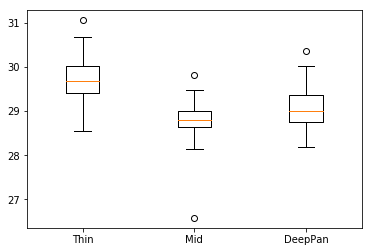

In [38]:
plt.figure("Boxploty EagleBoys")
plt.boxplot([np.array(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1],ndmin=2).T,
             np.array(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1],ndmin=2).T,
             np.array(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1],ndmin=2).T], 
            labels=["Thin", "Mid", "DeepPan"])
plt.show()

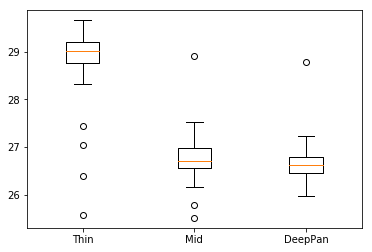

In [39]:
plt.figure("Boxploty Dominos")
plt.boxplot([np.array(data_Dominos[data_Dominos[:,1] == "Thin", -1],ndmin=2).T,
             np.array(data_Dominos[data_Dominos[:,1] == "Mid", -1],ndmin=2).T,
             np.array(data_Dominos[data_Dominos[:,1] == "DeepPan", -1],ndmin=2).T], 
            labels=["Thin", "Mid", "DeepPan"])
plt.show()

In [54]:
stats.ttest_1samp(X, round(np.mean(X),2))

Ttest_1sampResult(statistic=0.00582360453553211, pvalue=0.9953839282926381)

# Testy normality

Vzhledem k zamítnutí normality u Domino's Thin pizz jsem tyto testy opakoval v matlabu pomocí chi2gof s mle odhady parametrů a hypotéza byla zamítnuta stejně jako při testu níže. 


In [137]:
X = data_EagleBoys_Thin[:,-1].tolist()
stats.kstest((X-np.mean(X))/np.std(X), 'norm')

KstestResult(statistic=0.09945627421918901, pvalue=0.8351669587508694)

In [138]:
X = data_EagleBoys_Mid[:,-1].tolist()
stats.kstest((X-np.mean(X))/np.std(X), 'norm')

KstestResult(statistic=0.14244076659024948, pvalue=0.31794334324202733)

In [220]:
X = data_EagleBoys_DeepPan[:,-1].tolist()
stats.kstest((X-np.mean(X))/np.std(X), 'norm')

KstestResult(statistic=0.09963380542824235, pvalue=0.7989401136558834)

In [140]:
X = data_Dominos_DeepPan[:,-1].tolist()
stats.kstest((X-np.mean(X))/np.std(X), 'norm')

KstestResult(statistic=0.18045996428153943, pvalue=0.13032038687967162)

In [141]:
X = data_Dominos_Thin[:,-1].tolist()
stats.kstest((X-np.mean(X))/np.std(X), 'norm')

KstestResult(statistic=0.2500333853034649, pvalue=0.0074367771077739064)

In [142]:
X = data_Dominos_Mid[:,-1].tolist()
stats.kstest((X-np.mean(X))/np.std(X), 'norm')

KstestResult(statistic=0.13819314499708546, pvalue=0.3672344189389103)

In [154]:
X = [data_EagleBoys_Thin[:,-1].tolist(),
     data_EagleBoys_Mid[:,-1].tolist(),
     data_EagleBoys_DeepPan[:,-1].tolist(),
     data_Dominos_Thin[:,-1].tolist(),
     data_Dominos_Mid[:,-1].tolist(),
     data_Dominos_DeepPan[:,-1].tolist()]
     
     

pval = np.array([round(stats.kstest((i-np.mean(i))/np.std(i), 'norm')[1], 3) for i in X])
pval

array([0.835, 0.318, 0.799, 0.007, 0.367, 0.13 ])

In [156]:
pd.DataFrame(np.array([pval[:-3], pval[3:]]) , columns=["Thin", "Mid", "DeepPan"]).to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &   Thin &    Mid &  DeepPan \\\\\n\\midrule\n0 &  0.835 &  0.318 &    0.799 \\\\\n1 &  0.007 &  0.367 &    0.130 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Histogramy

In [194]:
from math import pi
def gauss(x, mi, sigma):
    return 1/(np.sqrt(2*pi*sigma))*np.exp(-((x-mi)**2)/2/sigma)

<IPython.core.display.Javascript object>


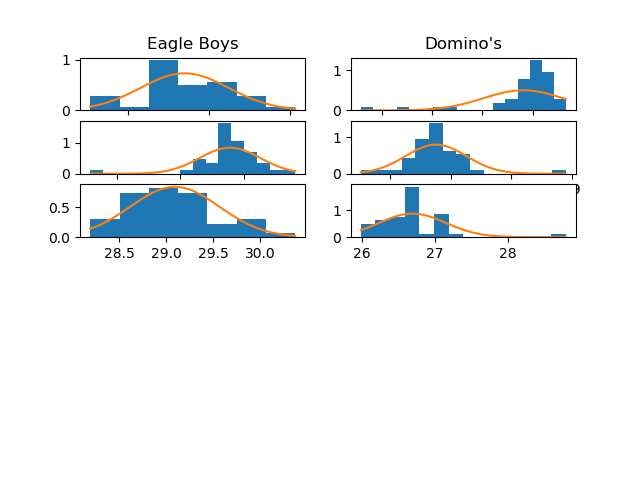

In [213]:
plt.figure("histogramy")
lab = ["Thin", "Mid", "DeepPan"]
lab =2*lab

for i,j in enumerate([1,3,5,2,4,6]):        
        plt.subplot(6,2,j)
        plt.hist(X[i], bins="auto", normed=True)
        x = np.linspace(min(X[i]), max(X[i]), 100)
        plt.plot(x, gauss(x, np.mean(X[i]), np.var(X[i])))
        if j==1:
            plt.title("Eagle Boys")
        if j==2:
            plt.title("Domino's")

        

#plt.tight_layout(pad = 0.001)

plt.show()

In [221]:
#pd.DataFrame(data_Dominos_DeepPan[:,-1]).to_csv("ddeep.csv", index =False)


# Testy rovností průměrů (středních hodnot)

In [222]:
stats.ttest_ind(data_Dominos_Thin[:,-1], data_Dominos_Mid[:,-1])

Ttest_indResult(statistic=14.114637855535667, pvalue=9.05256175166148e-24)

In [223]:
stats.ttest_ind(data_Dominos_Thin[:,-1], data_Dominos_DeepPan[:,-1])

Ttest_indResult(statistic=14.649988472732211, pvalue=1.7487598654127916e-24)

In [224]:
stats.ttest_ind(data_Dominos_DeepPan[:,-1], data_Dominos_Mid[:,-1])

Ttest_indResult(statistic=-0.5884493380088046, pvalue=0.5578884688110648)

In [225]:
stats.ttest_ind(data_EagleBoys_Thin[:,-1], data_EagleBoys_Mid[:,-1])

Ttest_indResult(statistic=8.05139716505743, pvalue=6.414079734063298e-12)

In [226]:
stats.ttest_ind(data_EagleBoys_Thin[:,-1], data_EagleBoys_DeepPan[:,-1])

Ttest_indResult(statistic=5.379750463103368, pvalue=7.229477848228884e-07)

In [227]:
stats.ttest_ind(data_EagleBoys_DeepPan[:,-1], data_EagleBoys_Mid[:,-1])

Ttest_indResult(statistic=2.9623114145570653, pvalue=0.0039701568170020145)

# Test zda pizzy EagleBoys mají průměr 12 palců = 30.48cm

In [228]:
stats.ttest_1samp(data_EagleBoys[:,-1], 30.48)

Ttest_1sampResult(statistic=-23.308123119439458, pvalue=3.8345559467176446e-47)

In [229]:
stats.ttest_1samp(data_EagleBoys_Thin[:,-1], 30.48)

Ttest_1sampResult(statistic=-8.851878894002798, pvalue=9.03328727857623e-11)

In [230]:
stats.ttest_1samp(data_EagleBoys_Mid[:,-1], 30.48)

Ttest_1sampResult(statistic=-23.0532735473221, pvalue=1.8333453793718426e-25)

In [231]:
stats.ttest_1samp(data_EagleBoys_DeepPan[:,-1], 30.48)

Ttest_1sampResult(statistic=-19.048174217304133, pvalue=2.7913996373753773e-22)

# Testy rozptylů

In [242]:
stats.bartlett(data_Dominos_Thin[:,-1], data_Dominos_Mid[:,-1], data_Dominos_DeepPan[:,-1])

BartlettResult(statistic=14.75697172024829, pvalue=0.0006245458201682763)

In [243]:
stats.bartlett(data_EagleBoys_Thin[:,-1], data_EagleBoys_Mid[:,-1], data_EagleBoys_DeepPan[:,-1])

BartlettResult(statistic=0.9650622442969261, pvalue=0.6172191559291929)

# Tvorba kontingenční tabulky

In [294]:
eb_sup = data_EagleBoys[data_EagleBoys[:,2] == "Supreme"]
eb_haw = data_EagleBoys[data_EagleBoys[:,2] == "Hawaiian"]
eb_BBQ = data_EagleBoys[data_EagleBoys[:,2] == "BBQMeatlovers"]

In [296]:
d_sup = data_Dominos[data_Dominos[:,2] == "Supreme"]
d_haw = data_Dominos[data_Dominos[:,2] == "Hawaiian"]
d_BBQ = data_Dominos[data_Dominos[:,2] == "BBQMeatlovers"]

In [334]:
dh = len(d_haw)
ds = len(d_sup)
db = len(d_BBQ)

dh27 = len(d_haw[d_haw[:,-1]<27])
ds27 = len(d_sup[d_sup[:,-1]<27])
db27 = len(d_BBQ[d_BBQ[:,-1]<27])

dh28 = len(d_haw[d_haw[:,-1]>28])
ds28 = len(d_sup[d_sup[:,-1]>28])
db28 = len(d_BBQ[d_BBQ[:,-1]>28])

In [335]:
d_con = np.array([[dh27, ds27, db27],
                 [dh-dh27-dh28, ds-ds27-ds28, db-db27-db28],
                 [dh28, ds28, db28]])

In [361]:
pd.DataFrame(d_con, columns=("Hawaiian", "Supreme", "BBQMeatlovers"))

,Hawaiian,Supreme,BBQMeatlovers
0,24,17,24
1,4,9,6
2,13,15,13


In [362]:
pd.DataFrame(d_con, columns=("Hawaiian", "Supreme", "BBQMeatlovers")).to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  Hawaiian &  Supreme &  BBQMeatlovers \\\\\n\\midrule\n0 &        24 &       17 &             24 \\\\\n1 &         4 &        9 &              6 \\\\\n2 &        13 &       15 &             13 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [340]:
eh = len(eb_haw)
es = len(eb_sup)
eb = len(eb_BBQ)

eh27 = len(eb_haw[eb_haw[:,-1]<28.8])
es27 = len(eb_sup[eb_sup[:,-1]<28.8])
eb27 = len(eb_BBQ[eb_BBQ[:,-1]<28.8])

eh28 = len(eb_haw[eb_haw[:,-1]>29.5])
es28 = len(eb_sup[eb_sup[:,-1]>29.5])
eb28 = len(eb_BBQ[eb_BBQ[:,-1]>29.5])

In [341]:
e_con = np.array([[eh27, es27, eb27],
                 [eh-eh27-eh28, es-es27-es28, eb-eb27-eb28],
                 [eh28, es28, eb28]])

In [360]:
pd.DataFrame(e_con, columns=("Hawaiian", "Supreme", "BBQMeatlovers"))

,Hawaiian,Supreme,BBQMeatlovers
0,13,11,15
1,17,21,16
2,13,8,11


In [359]:
pd.DataFrame(e_con, columns=("Hawaiian", "Supreme", "BBQMeatlovers")).to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  Hawaiian &  Supreme &  BBQMeatlovers \\\\\n\\midrule\n0 &        13 &       11 &             15 \\\\\n1 &        17 &       21 &             16 \\\\\n2 &        13 &        8 &             11 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [348]:
chi2, p, dof, ex = stats.chi2_contingency(d_con)

In [352]:
print(chi2, p, dof)

3.685754726656096 0.45020120769002114 4


In [353]:
chi2, p, dof, ex = stats.chi2_contingency(e_con)

In [354]:
print(chi2, p, dof)

2.5068225316529578 0.6434145310734574 4
